# Neural Network

## Setup

### Run the Data Preprocessing notebook once to import the get_data method

In [36]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [37]:
%run data_evaluation.ipynb

### Imports

In [38]:
import numpy as np
import pandas as pd

from keras import regularizers
from keras.models import Sequential
from keras.layers import BatchNormalization, Dense, Dropout    
from keras.callbacks import EarlyStopping

### Hyperparmeters

In [39]:
# for get_data function
enable_feature_engineering_gender = True
enable_feature_engineering_height_weight = True 
enable_feature_engineering_gluc_chol = True
enable_feature_engineering_alco_smoking = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.8, 0.05, 0.15)

### Get the data

In [40]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering_gender, enable_feature_engineering_height_weight, enable_feature_engineering_gluc_chol, enable_feature_engineering_alco_smoking, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height too low.
Dropped 1 rows -> height too high.
Dropped 2 rows -> weight too low.
Dropped 0 rows -> weight too high.
Dropped 186 rows -> systolic bp too low.
Dropped 47 rows -> systolic bp too high.
Dropped 40 rows -> diastolic bp too low.
Dropped 948 rows -> diastolic bp too high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


D:\Programms\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:177: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  warnings.warn(


## Model

### Create the model

In [41]:
classifier = Sequential()

classifier.add(Dense(x_train.shape[1], activation='tanh', input_shape=(x_train.shape[1],)))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(512, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(256, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.0125))
classifier.add(Dense(1, activation='sigmoid'))

classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [42]:
def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for MAE
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training vs Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

Epoch 1/100
429/429 [==============================] - 5s 13ms/step - loss: 0.5871 - accuracy: 0.6949 - val_loss: 0.5531 - val_accuracy: 0.7274
Epoch 2/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5652 - accuracy: 0.7173 - val_loss: 0.5567 - val_accuracy: 0.7207
Epoch 3/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5622 - accuracy: 0.7199 - val_loss: 0.5505 - val_accuracy: 0.7292
Epoch 4/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5602 - accuracy: 0.7215 - val_loss: 0.5532 - val_accuracy: 0.7239
Epoch 5/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5572 - accuracy: 0.7237 - val_loss: 0.5454 - val_accuracy: 0.7302
Epoch 6/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5568 - accuracy: 0.7233 - val_loss: 0.5484 - val_accuracy: 0.7284
Epoch 7/100
429/429 [==============================] - 5s 12ms/step - loss: 0.5549 - accuracy: 0.7245 - val_loss: 0.5468 - val_accuracy:

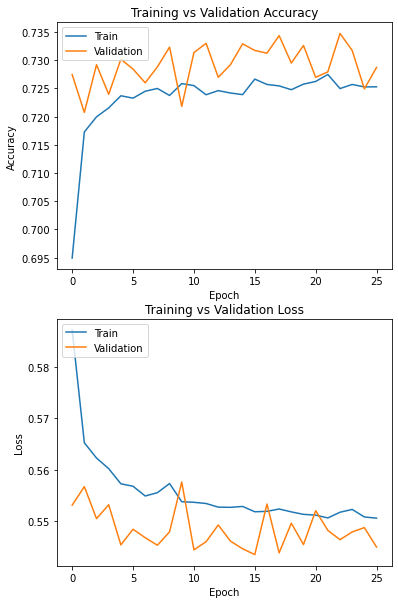

"\nx_train = x_train\ny_train = y_train\n\nfrom sklearn.model_selection import KFold\nkf = KFold(n_splits=5, random_state=42, shuffle = True)\nfor train_index, test_index in kf.split(x_train):\n    x_fold_train, x_fold_val = x_train.iloc[train_index], x_train.iloc[test_index]\n    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]\n    \n    history = classifier.fit(\n        x_fold_train.astype('float32'),\n        y_fold_train.astype('float32'),\n        batch_size=64,\n        epochs=10,\n        validation_data=(x_fold_val.astype('float32'), y_fold_val.astype('float32'))\n    )\n    \n    plot_hist(history.history)\n    \n"

In [43]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)

history = classifier.fit(
    x_train.astype('float32'),
    y_train.astype('float32'),
    batch_size=128,
    epochs=100,
    validation_data=(x_val.astype('float32'), y_val.astype('float32')),
    callbacks=[early_stop]
)

plot_hist(history.history)

"""
x_train = x_train
y_train = y_train

from sklearn.model_selection import KFold
kf = KFold(n_splits=5, random_state=42, shuffle = True)
for train_index, test_index in kf.split(x_train):
    x_fold_train, x_fold_val = x_train.iloc[train_index], x_train.iloc[test_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[test_index]
    
    history = classifier.fit(
        x_fold_train.astype('float32'),
        y_fold_train.astype('float32'),
        batch_size=64,
        epochs=10,
        validation_data=(x_fold_val.astype('float32'), y_fold_val.astype('float32'))
    )
    
    plot_hist(history.history)
    
"""

## Evaluation

### Predict the test set

In [44]:
y_prob = classifier.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

### Apply the evaluation metrics

Accuracy Score:
0.7489063867016623

Precision Score:
0.7545565006075334

Recall Score:
0.7310182460270748

F1-Score:
0.7426008968609866

Cost:
1318



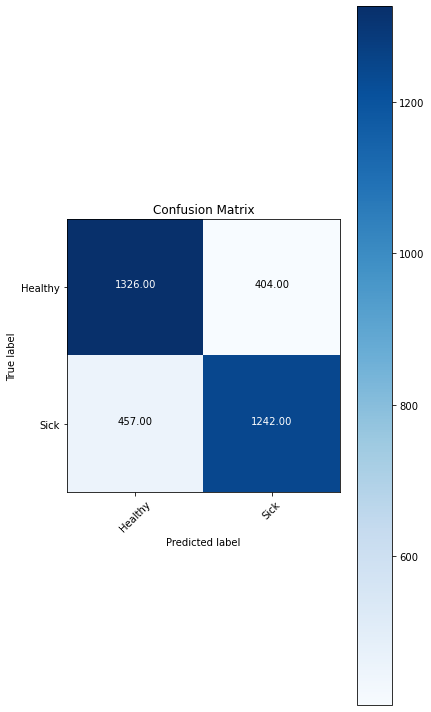

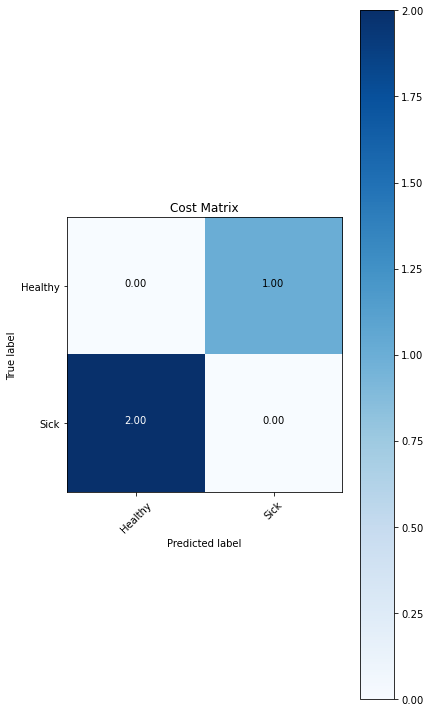

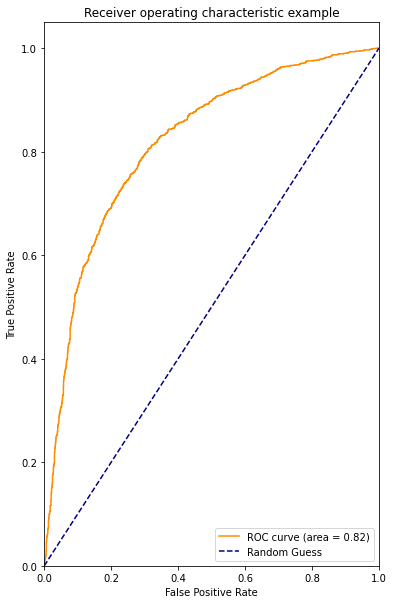


ROC Score:
0.8173919034318045


In [45]:
show_evaluation(y_test, y_pred, y_prob)

In [ ]:
# Save predictions
method_name = 'Neural Network'
predicted_probabilities = y_prob
savePredictedProbabilities(method_name, y_test, predicted_probabilities)